## Question: What makes students get good maths grades?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("data/student-mat.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


395 observations and 33 variables:
- **school**: GP or MS (Gabriel Pereira, Mousinho da Silveira)
- **sex**: F or M (female, male)
- **age**: 15-22
- **address**: U or R (urban, rural)
- **famsize**: GT3 or LE3 (greater than 3, less or equal to 3)
- **Pstatus**: A or T (apart, together)
- **Medu** and **Fedu**: 0-4 (0 = none, 1 = primary edu, 2 = 5th to 9th grade, 3 = secondary edu, 4 = higher edu)
- **Mjob** and **Fjob**: at_home, health, services, teacher or other
- **reason**: course, home, reputation or other
- **guardian**: mother, father or other
- **traveltime** and **studytime**: 1-4 (hours)
- **failures**: 0-3
- **schoolsup**, **famsup**, **paid**, **activities**, **nursery**, **higher**, **internet** and **romantic**: yes or no
- **famrel**, **freetime**, **goout**, **Dalc**, **Walc** and **health**: 1-5 (very low to very high)
- **absences**: 0-75
- **G1**, **G2** and **G3**: 0-20 (grade)

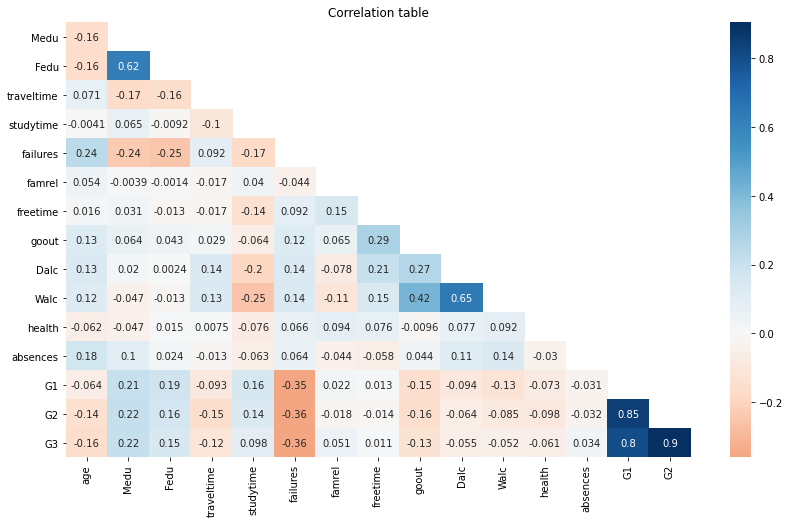

In [3]:
fig = plt.figure(figsize=(14, 8))
ax = fig.gca()

corr = df.corr().iloc[1:, :-1]

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

sns.heatmap(corr, annot=True, ax=ax, cmap="RdBu", mask=mask, center=0)
plt.title("Correlation table")

plt.savefig('plots/corr.svg')
plt.show()

We remark a strong positive correlation (> 0.6) between:
- **Medu** and **Fedu**
- **Dalc** and **Walc**
- **G1**, **G2** and **G3**

We can group these variables as they are similar and it will simplify the visualization

In [4]:
df2 = df.copy()
df2["G"] = ((df.G1 + df.G2 + df.G3) / 3).round(2)
df2.insert(8, "Pedu", (df.Medu + df.Fedu) // 2)
df2.insert(29, "alc", (df.Dalc + df.Walc) // 2)
df2.drop(["Medu", "Fedu", "Dalc", "Walc", "G1", "G2", "G3"], axis=1, inplace=True)

Here we replace binary variable values by 0 and 1

In [5]:
df2.replace(["yes", "no"], [1, 0], inplace=True)
df2.replace(["U", "R"], [1, 0], inplace=True)
df2.replace(["GT3", "LE3"], [1, 0], inplace=True)
df2.replace(["T", "A"], [1, 0], inplace=True)
df2.replace(["F", "M"], [1, 0], inplace=True)
df2.replace(["MS", "GP"], [1, 0], inplace=True)

We then replot the correlation table taking into account the previous modifications

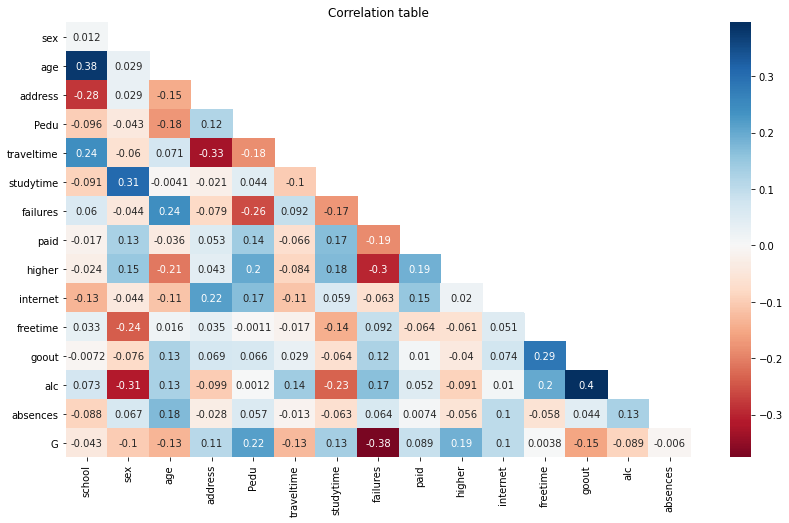

In [6]:
fig = plt.figure(figsize=(14, 8))
ax = fig.gca()

corr = df2.drop(["health", "famrel", "famsize", "Pstatus",
                 "nursery", "schoolsup", "famsup", "activities",
                 "romantic"], axis=1).corr().iloc[1:, :-1]
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

sns.heatmap(corr, annot=True, ax=ax, cmap="RdBu", mask=mask, center=0)
plt.title("Correlation table")

plt.savefig('plots/corr_full.svg')
plt.show()

In [7]:
df2.groupby(["school", "sex"]).mean()

age   address   famsize   Pstatus      Pedu  traveltime  \
school sex                                                                  
0      0    16.457831  0.807229  0.680723  0.897590  2.566265    1.433735   
       1    16.579235  0.830601  0.759563  0.885246  2.404372    1.344262   
1      0    18.238095  0.428571  0.571429  0.952381  1.904762    1.952381   
       1    17.840000  0.480000  0.680000  0.920000  2.400000    1.880000   

            studytime  failures  schoolsup    famsup  ...    higher  internet  \
school sex                                            ...                       
0      0     1.801205  0.331325   0.090361  0.560241  ...  0.921687  0.867470   
       1     2.300546  0.306011   0.196721  0.715847  ...  0.978142  0.836066   
1      0     1.476190  0.666667   0.000000  0.333333  ...  0.857143  0.714286   
       1     2.120000  0.280000   0.000000  0.440000  ...  1.000000  0.680000   

            romantic    famrel  freetime     goout       alc    health  \
school sex                                                               
0      0    0.283133  4.024096  3.457831  3.180723  1.975904  3.783133   
       1    0.360656  3.901639  3.010929  3.049180  1.437158  3.387978   
1      0    0.285714  3.809524  3.714286  3.333333  2.523810  3.619048   
       1    0.520000  3.840000  3.000000  2.880000  1.400000  3.200000   

            absences          G  
school sex                       
0      0    5.222892  11.200723  
       1    6.639344  10.316448  
1      0    4.523810  10.063810  
       1    3.120000  10.387600  

[4 rows x 23 columns]

- **age**
    - GP school: younger students, girls and boys have a similar mean age (16.5)
    - MS school: older students, boys are older than girls on average (18.2 > 17.8)
- **Pedu**
    - GP school: parents of boys are a little more educated (2.6 > 2.4)
    - MS school: parents of girls are more educated (2.4 > 1.9)
- **traveltime**
    - boys travel more than girls (0.1 h more)
- **studytime**
    - girls study more than boys (0.6 h more)
- **failures**
    - boys fail more than girls (0.33 > 0.31), it is even more marked for MS (0.7 > 0.3)
- **famrel**
    - boys and girls have the same family relation (around 3.8-4)
- **freetime**, **goout** and **alc**
    - boys have more free time, go out more often and drink more alcohol than girls (even more marked for MS)
- **health**
    - boys are in better health than girls (0.4 more)
- **absences**
    - GP school: girls are more absent (6.6 > 5.2)
    - MS school: boys are more absent (4.5 > 3.1)
- **grades**
    - GP school: boys have better grades (11.2 > 10.3)
    - MS school: girls have better grades (10.4 > 10)

In [8]:
age = df2.groupby("age").mean()
age

,school,sex,address,famsize,Pstatus,Pedu,traveltime,studytime,failures,schoolsup,...,higher,internet,romantic,famrel,freetime,goout,alc,health,absences,G
age,,,,,,,,,,,,,,,,,,,,,
15,0.000000,0.463415,0.817073,0.743902,0.853659,2.695122,1.365854,2.158537,0.268293,0.280488,...,1.000000,0.890244,0.231707,4.000000,3.280488,2.743902,1.500000,3.585366,3.341463,11.284634
16,0.000000,0.519231,0.894231,0.730769,0.913462,2.538462,1.403846,1.875000,0.230769,0.173077,...,0.971154,0.846154,0.269231,3.836538,3.230769,3.173077,1.701923,3.701923,5.451923,11.050673
17,0.122449,0.591837,0.724490,0.704082,0.897959,2.336735,1.459184,2.020408,0.244898,0.051020,...,0.959184,0.806122,0.377551,3.908163,3.224490,3.204082,1.826531,3.500000,6.459184,10.550816
18,0.304878,0.524390,0.670732,0.646341,0.926829,2.402439,1.585366,2.146341,0.292683,0.048780,...,0.890244,0.841463,0.426829,4.024390,3.121951,3.304878,1.804878,3.439024,6.048780,10.134024
19,0.250000,0.583333,0.708333,0.750000,0.916667,1.875000,1.458333,2.083333,1.166667,0.041667,...,0.875000,0.750000,0.458333,3.875000,3.250000,2.916667,1.583333,3.500000,10.458333,9.236667
20,0.666667,0.333333,1.000000,0.666667,0.333333,2.333333,1.333333,2.000000,1.333333,0.000000,...,1.000000,0.333333,0.333333,5.000000,4.666667,3.333333,2.000000,4.000000,5.000000,13.780000
21,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,...,1.000000,0.000000,0.000000,5.000000,5.000000,3.000000,3.000000,3.000000,3.000000,8.330000
22,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,...,0.000000,1.000000,1.000000,5.000000,4.000000,5.000000,5.000000,1.000000,16.000000,7.330000


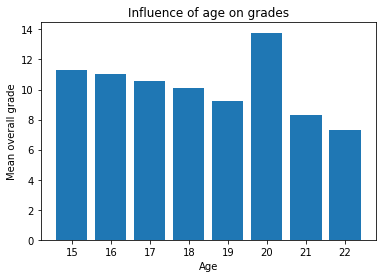

In [9]:
plt.bar(age.index, age.G)
plt.title("Influence of age on grades")
plt.xlabel("Age")
plt.ylabel("Mean overall grade")

plt.savefig('plots/age_grade.svg')
plt.show()

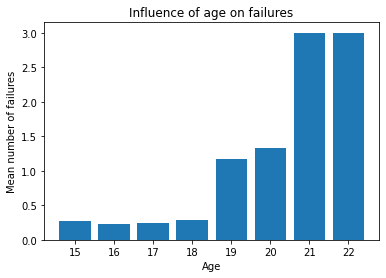

In [10]:
plt.bar(age.index, age.failures)
plt.title("Influence of age on failures")
plt.xlabel("Age")
plt.ylabel("Mean number of failures")

plt.savefig('plots/age_fail.svg')
plt.show()

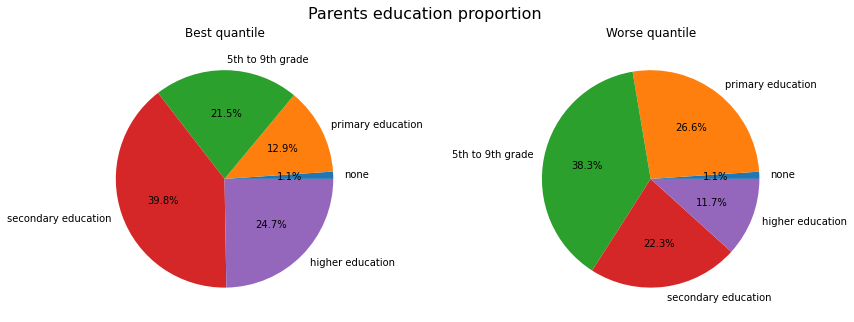

In [11]:
plt.figure(figsize=(14, 5))
edu = ["none", "primary education", "5th to 9th grade", "secondary education", "higher education"]

plt.subplot(121)
Pedu_best = df2[df2.G > df2.G.quantile(0.75)].groupby("Pedu").count()
plt.pie(Pedu_best.G, labels=edu, autopct="%1.1f%%")
plt.title("Best quantile")

plt.subplot(122)
Pedu_worse = df2[df2.G < df2.G.quantile(0.25)].groupby("Pedu").count()
plt.pie(Pedu_worse.G, labels=edu, autopct="%1.1f%%")
plt.title("Worse quantile")

plt.suptitle("Parents education proportion", size=16)
plt.savefig('plots/edu.svg')
plt.show()

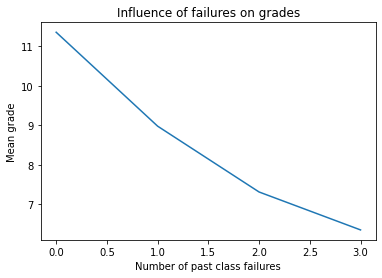

In [12]:
failures = df2.groupby("failures").mean()
plt.plot(failures.index, failures.G)

plt.title("Influence of failures on grades")
plt.xlabel("Number of past class failures")
plt.ylabel("Mean grade")

plt.savefig('plots/failures.svg')
plt.show()

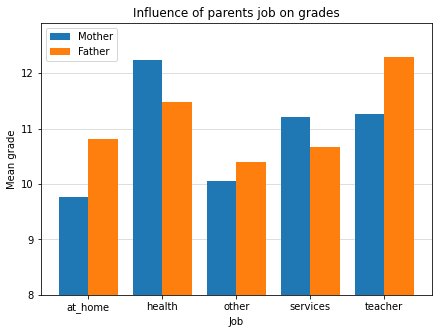

In [13]:
Mjob = df2.groupby("Mjob").mean()
Fjob = df2.groupby("Fjob").mean()

x = np.arange(len(Mjob.index))
width = 0.4

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x - width/2, Mjob.G, width, label='Mother')
ax.bar(x + width/2, Fjob.G, width, label='Father')
ax.set_xticks(x)
ax.set_xticklabels(Mjob.index)

plt.title("Influence of parents job on grades")
plt.xlabel("Job")
plt.ylabel("Mean grade")
plt.legend()
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#D6D6D6')
plt.ylim(8)

plt.savefig('plots/job.svg')
plt.show()

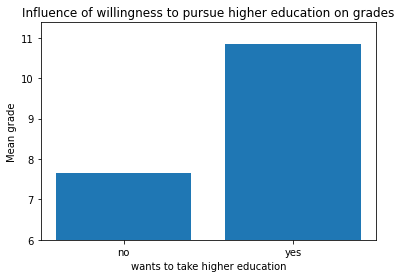

In [14]:
higher = df2.groupby("higher").mean()
plt.bar(["no", "yes"], higher.G)

plt.title("Influence of willingness to pursue higher education on grades")
plt.xlabel("wants to take higher education")
plt.ylabel("Mean grade")
plt.ylim(6)

plt.savefig('plots/higher.svg')
plt.show()

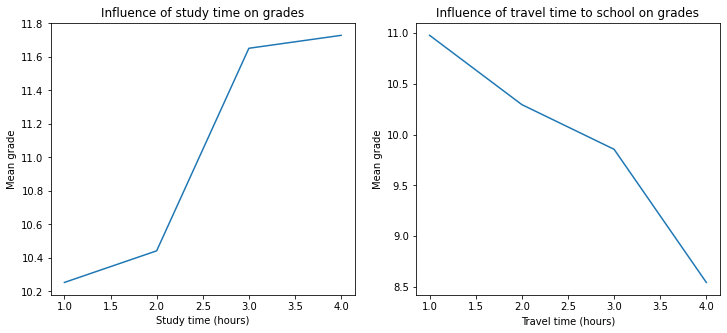

In [15]:
stime = df2.groupby("studytime").mean()
ttime = df2.groupby("traveltime").mean()

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(stime.index, stime.G)
plt.title("Influence of study time on grades")
plt.xlabel("Study time (hours)")
plt.ylabel("Mean grade")

plt.subplot(122)
plt.plot(ttime.index, ttime.G)
plt.title("Influence of travel time to school on grades")
plt.xlabel("Travel time (hours)")
plt.ylabel("Mean grade")

plt.savefig('plots/time.svg')
plt.show()

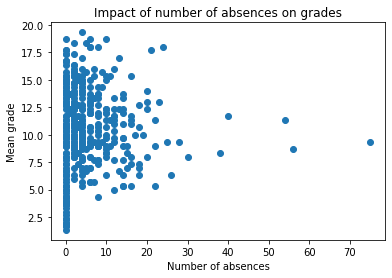

In [16]:
plt.scatter(df2.absences, df2.G)
plt.title("Impact of number of absences on grades")
plt.xlabel("Number of absences")
plt.ylabel("Mean grade")

plt.savefig('plots/abs.svg')
plt.show()

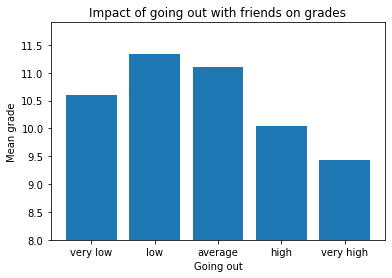

In [17]:
goout = df2.groupby("goout").mean()

plt.bar(["very low", "low", "average", "high", "very high"], goout.G)
plt.title("Impact of going out with friends on grades")
plt.xlabel("Going out")
plt.ylabel("Mean grade")
plt.ylim(8)

plt.savefig('plots/goout.svg')
plt.show()

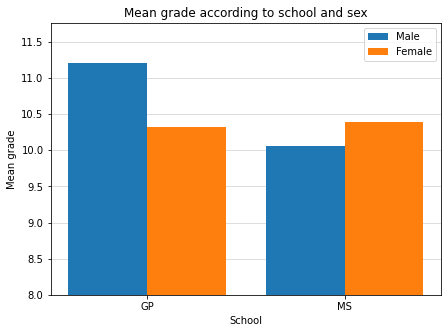

In [18]:
male = df2[df2.sex == 0].groupby("school").mean()
female = df2[df2.sex == 1].groupby("school").mean()

x = np.arange(2)
width = 0.4

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x - width/2, male.G, width, label='Male')
ax.bar(x + width/2, female.G, width, label='Female')
ax.set_xticks(x)
ax.set_xticklabels(["GP", "MS"])

plt.title("Mean grade according to school and sex")
plt.xlabel("School")
plt.ylabel("Mean grade")
plt.legend()
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#D6D6D6')
plt.ylim(8)

plt.savefig('plots/grade.svg')
plt.show()

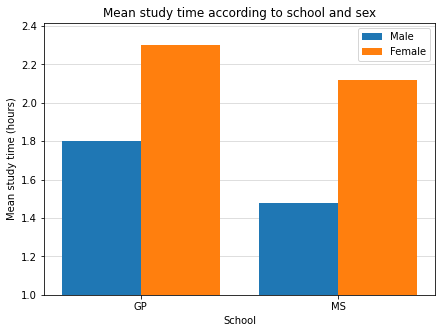

In [19]:
male = df2[df2.sex == 0].groupby("school").mean()
female = df2[df2.sex == 1].groupby("school").mean()

x = np.arange(2)
width = 0.4

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x - width/2, male.studytime, width, label='Male')
ax.bar(x + width/2, female.studytime, width, label='Female')
ax.set_xticks(x)
ax.set_xticklabels(["GP", "MS"])

plt.title("Mean study time according to school and sex")
plt.xlabel("School")
plt.ylabel("Mean study time (hours)")
plt.legend()
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#D6D6D6')
plt.ylim(1)

plt.savefig('plots/study.svg')
plt.show()